### Install Dependencies

In [77]:
#%pip install pandas
#%pip install matplotlib
#%pip install python-dotenv
#%pip install coinbase-advanced-py

### Import dependencies

In [78]:
import os
import pandas as pd  
import matplotlib.pyplot as plt
from coinbase.rest import RESTClient
from dotenv import load_dotenv
import json
import time
import matplotlib.pyplot as plt

client = RESTClient() # Uses environment variables for API key and secretimport os

In [79]:
load_dotenv()

api_secret = os.getenv('CB_PRIVATE_KEY')
api_key = os.getenv('CB_KEY_NAME')

client = RESTClient(api_key=api_key, api_secret=api_secret) # Uses environment variables for API key and secretimport os


In [80]:
total_trades = []
start_time = int(time.time()) - 2
limit = 5000
interval = 15

for i in range(limit):
    end_time = start_time + 2
    trades = client.get_market_trades('ETH-USD', 1, start_time, end_time)
    try:
        total_trades.append(trades['trades'][0])
    except IndexError as e:
        print('Index error, adding response right to list')
        total_trades.append(trades)
    
    start_time -= interval
    print(f'Completed {i+1}/{limit} queries')
    time.sleep(0.1)

Completed 1/5000 queries
Completed 2/5000 queries
Completed 3/5000 queries
Completed 4/5000 queries
Completed 5/5000 queries
Completed 6/5000 queries
Completed 7/5000 queries
Completed 8/5000 queries
Completed 9/5000 queries
Completed 10/5000 queries
Completed 11/5000 queries
Completed 12/5000 queries
Completed 13/5000 queries
Completed 14/5000 queries
Completed 15/5000 queries
Completed 16/5000 queries
Completed 17/5000 queries
Completed 18/5000 queries
Completed 19/5000 queries
Completed 20/5000 queries
Completed 21/5000 queries
Completed 22/5000 queries
Completed 23/5000 queries
Completed 24/5000 queries
Completed 25/5000 queries
Completed 26/5000 queries
Completed 27/5000 queries
Completed 28/5000 queries
Completed 29/5000 queries
Completed 30/5000 queries
Completed 31/5000 queries
Completed 32/5000 queries
Completed 33/5000 queries
Completed 34/5000 queries
Completed 35/5000 queries
Completed 36/5000 queries
Completed 37/5000 queries
Completed 38/5000 queries
Completed 39/5000 que

In [81]:
str_trades = str(total_trades)
# Replace single quotes with double quotes to make it JSON-compatible
data_string_fixed = str_trades.replace("'", '"')

# Convert the string to a proper Python list of dictionaries
data_list = json.loads(data_string_fixed)

In [82]:
df_trades = pd.DataFrame(data_list)
df_trades

,trade_id,product_id,price,size,time,side,exchange,bid,ask,trades,best_bid,best_ask
0,581156882,ETH-USD,3940.75,1.0109108,2024-12-12T03:51:55.653508Z,BUY,,,,NaN,NaN,NaN
1,581156408,ETH-USD,3940.49,0.08289,2024-12-12T03:51:40.969747Z,SELL,,,,NaN,NaN,NaN
2,581156040,ETH-USD,3946,1.63853986,2024-12-12T03:51:25.790657Z,BUY,,,,NaN,NaN,NaN
3,581155828,ETH-USD,3948.16,0.01441992,2024-12-12T03:51:10.997689Z,SELL,,,,NaN,NaN,NaN
4,581155506,ETH-USD,3945.35,0.0142,2024-12-12T03:50:55.605769Z,SELL,,,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,580639974,ETH-USD,3680.9,0.01344814,2024-12-11T07:03:10.284759Z,SELL,,,,NaN,NaN,NaN
4996,580639920,ETH-USD,3680.59,0.0593,2024-12-11T07:02:55.640251Z,SELL,,,,NaN,NaN,NaN
4997,580639893,ETH-USD,3680.81,0.01367538,2024-12-11T07:02:40.964713Z,SELL,,,,NaN,NaN,NaN
4998,580639829,ETH-USD,3680.57,0.13334856,2024-12-11T07:02:25.380236Z,BUY,,,,NaN,NaN,NaN


C:\Users\mattr\AppData\Local\Temp\ipykernel_36488\3006657511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['price'] = pd.to_numeric(df_trades['price'])


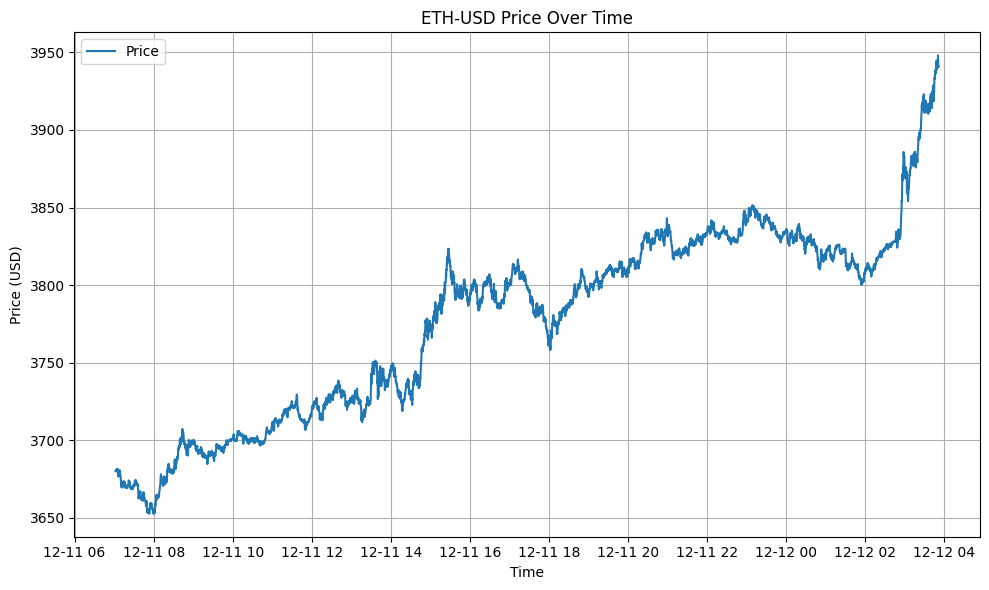

In [83]:
# Convert 'time' to datetime, coercing errors
df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')

# Drop rows where 'time' is NaT (invalid date)
df_trades = df_trades.dropna(subset=['time'])

# Convert 'price' column to numeric
df_trades['price'] = pd.to_numeric(df_trades['price'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_trades['time'], df_trades['price'], linestyle='-', label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('ETH-USD Price Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
df_trades.to_csv('trades.csv')